In [121]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from helpers import *
from tqdm import tqdm
from implementations import *

Selecting Features:   0%|          | 0/79 [08:36<?, ?it/s]


#### Load the dataset

In [90]:
x_train = np.genfromtxt("data/x_train.csv", delimiter=",", skip_header=1)
features = np.genfromtxt("data/x_train.csv", delimiter=",", dtype=str, max_rows=1)
y_train = np.genfromtxt("data/y_train.csv", delimiter=",", skip_header=1)
y_features = np.genfromtxt("data/y_train.csv", delimiter=",", dtype=str, max_rows=1)
x_test = np.genfromtxt("data/x_test.csv",delimiter=",", skip_header=1)

In [91]:
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("Features", features)
print(y_features)

x_train shape: (328135, 322)
x_test shape: (109379, 322)
y_train shape: (328135, 2)
Features ['Id' '_STATE' 'FMONTH' 'IDATE' 'IMONTH' 'IDAY' 'IYEAR' 'DISPCODE' 'SEQNO'
 '_PSU' 'CTELENUM' 'PVTRESD1' 'COLGHOUS' 'STATERES' 'CELLFON3' 'LADULT'
 'NUMADULT' 'NUMMEN' 'NUMWOMEN' 'CTELNUM1' 'CELLFON2' 'CADULT' 'PVTRESD2'
 'CCLGHOUS' 'CSTATE' 'LANDLINE' 'HHADULT' 'GENHLTH' 'PHYSHLTH' 'MENTHLTH'
 'POORHLTH' 'HLTHPLN1' 'PERSDOC2' 'MEDCOST' 'CHECKUP1' 'BPHIGH4' 'BPMEDS'
 'BLOODCHO' 'CHOLCHK' 'TOLDHI2' 'CVDSTRK3' 'ASTHMA3' 'ASTHNOW' 'CHCSCNCR'
 'CHCOCNCR' 'CHCCOPD1' 'HAVARTH3' 'ADDEPEV2' 'CHCKIDNY' 'DIABETE3'
 'DIABAGE2' 'SEX' 'MARITAL' 'EDUCA' 'RENTHOM1' 'NUMHHOL2' 'NUMPHON2'
 'CPDEMO1' 'VETERAN3' 'EMPLOY1' 'CHILDREN' 'INCOME2' 'INTERNET' 'WEIGHT2'
 'HEIGHT3' 'PREGNANT' 'QLACTLM2' 'USEEQUIP' 'BLIND' 'DECIDE' 'DIFFWALK'
 'DIFFDRES' 'DIFFALON' 'SMOKE100' 'SMOKDAY2' 'STOPSMK2' 'LASTSMK2'
 'USENOW3' 'ALCDAY5' 'AVEDRNK2' 'DRNK3GE5' 'MAXDRNKS' 'FRUITJU1' 'FRUIT1'
 'FVBEANS' 'FVGREEN' 'FVORANG' 'VEGETAB1'

#### Categorical features

In [92]:
def to_categorical(array, range_min, range_max, n_bins):
    # Filter array to include only values within the specified range
    filtered_values = array[(array >= range_min) & (array <= range_max)]
    
    # Calculate the bin edges using quantiles
    bin_edges = np.quantile(filtered_values, np.linspace(0, 1, n_bins + 1))
    
    def assign_bin(value):
        # Check if the value is NaN
        if np.isnan(value):
            return -1
        
        # If the value is outside the range, return it as is
        if value < range_min or value > range_max:
            return value
        
        # Assign bin based on which range the value falls into
        # We use right=True to ensure that values exactly equal to range_max are included in the last bin
        return np.digitize(value, bin_edges, right=True)
    
    return assign_bin

mapping_dict = {
    "GENHLTH": lambda value: value if value <= 9 else -1,
    "PHYSHLTH": to_categorical(array=x_train[:, features=="PHYSHLTH"].flatten(), range_min=0, range_max=30, n_bins=4),
    "MENTHLTH": to_categorical(array=x_train[:, features=="MENTHLTH"].flatten(), range_min=0, range_max=30, n_bins=4),
    "POORHLTH": to_categorical(array=x_train[:, features=="POORHLTH"].flatten(), range_min=0, range_max=30, n_bins=4),
    "HLTHPLN1": lambda value: value if not np.isnan(value) else -1,
    "MEDCOST": lambda value: value if value <= 7 else -1,
    "CHECKUP1": lambda value: value if value <= 8 else -1,
    "BPHIGH4": lambda value: value if value <= 7 else -1,
    "BPMEDS": lambda value: value if not np.isnan(value) else -1,
    "BLOODCHO": lambda value: value if not np.isnan(value) else -1,
    "CHOLCHK": lambda value: value if not np.isnan(value) else -1,
    # "CVDINFR4": lambda value: 1 if value == 1 else 0,
    # "CVDCRHD4": lambda value: 1 if value == 1 else 0,
    "TOLDHI2": lambda value: value if not np.isnan(value) else -1,
    "CVDSTRK3": lambda value: value if not np.isnan(value) else -1,
    "ASTHMA3": lambda value: value if not np.isnan(value) else -1,
    "ASTHNOW": lambda value: value if not np.isnan(value) else -1,
    "CHCSCNCR": lambda value: value if not np.isnan(value) else -1,
    "CHCOCNCR": lambda value: value if not np.isnan(value) else -1,
    "CHCCOPD1": lambda value: value if not np.isnan(value) else -1,
    "HAVARTH3": lambda value: value if not np.isnan(value) else -1,
    "ADDEPEV2": lambda value: value if not np.isnan(value) else -1,
    "CHCKIDNY": lambda value: value if not np.isnan(value) else -1,
    "DIABETE3": lambda value: value if not np.isnan(value) else -1,
    "SEX": lambda value: value if not np.isnan(value) else -1,
    "MARITAL": lambda value: value if not np.isnan(value) else -1,
    "EDUCA": lambda value: value if not np.isnan(value) else -1,
    "VETERAN3": lambda value: value if not np.isnan(value) else -1,
    "INCOME2": lambda value: value if not np.isnan(value) else -1,
    "INTERNET": lambda value : value if not np.isnan(value) else -1,
    "WTKG3": to_categorical(array=x_train[:, features=="WTKG3"].flatten(), range_min=23, range_max=295, n_bins=6),
    "QLACTLM2": lambda value : value if not np.isnan(value) else -1,
    "USEEQUIP": lambda value : value if not np.isnan(value) else -1,
    "BLIND": lambda value : value if not np.isnan(value) else -1,
    "DECIDE": lambda value : value if not np.isnan(value) else -1,
    "DIFFWALK": lambda value : value if not np.isnan(value) else -1,
    "DIFFDRES": lambda value : value if not np.isnan(value) else -1,
    "DIFFALON": lambda value : value if not np.isnan(value) else -1,
    "SMOKE100": lambda value : value if not np.isnan(value) else -1,
    "SMOKDAY2": lambda value : value if not np.isnan(value) else -1,
    "LASTSMK2": lambda value : value if not np.isnan(value) else -1,
    "USENOW3": lambda value : value if not np.isnan(value) else -1,
    "AVEDRNK2": to_categorical(array=x_train[:, features=="AVEDRNK2"].flatten(), range_min=1, range_max=76, n_bins=5),
    "DRNK3GE5": to_categorical(array=x_train[:, features=="DRNK3GE5"].flatten(), range_min=1, range_max=76, n_bins=5),
    "EXERANY2": lambda value : value if not np.isnan(value) else -1,
    # "EXERHMM1": lambda value: str(value//200) if value <= 959 and value not in [777,999] else -1,
    "LMTJOIN3": lambda value : value if not np.isnan(value) else -1,
    "FLUSHOT6": lambda value : value if not np.isnan(value) else -1,
    "PDIABTST": lambda value : value if not np.isnan(value) else -1,
    "PREDIAB1": lambda value : value if not np.isnan(value) else -1,
    "INSULIN": lambda value : value if not np.isnan(value) else -1,
    "CIMEMLOS": lambda value : value if not np.isnan(value) else -1,
    "_RFHLTH": lambda value : value if not np.isnan(value) else -1,
    "_HCVU651": lambda value : value if not np.isnan(value) else -1,
    "_RFHYPE5": lambda value : value if not np.isnan(value) else -1,
    "_CHOLCHK": lambda value : value if not np.isnan(value) else -1,
    "_RFCHOL": lambda value : value if not np.isnan(value) else -1,
    # "_MICHD": lambda value: value if value <= 2 else -1,
    "_LTASTH1": lambda value : value if not np.isnan(value) else -1,
    "_CASTHM1": lambda value : value if not np.isnan(value) else -1,
    "_DRDXAR1": lambda value : value if not np.isnan(value) else -1,
    "_AGEG5YR": lambda value : value if not np.isnan(value) else -1,
    "_AGE_G": lambda value : value if not np.isnan(value) else -1,
    "HTM4": to_categorical(array=x_train[:, features=="HTM4"].flatten(), range_min=0.91, range_max=2.44, n_bins=6),
    "_RFBMI5": lambda value : value if not np.isnan(value) else -1,
    "_EDUCAG": lambda value : value if not np.isnan(value) else -1,
    "_SMOKER3": lambda value : value if not np.isnan(value) else -1,
    "_RFBING5": lambda value : value if not np.isnan(value) else -1,
    "_BMI5CAT": lambda value : value if not np.isnan(value) else -1,
    "_RFDRHV5": lambda value : value if not np.isnan(value) else -1,
    "FTJUDA1_": to_categorical(array=x_train[:, features=="FTJUDA1_"].flatten(), range_min=0, range_max=99.99, n_bins=4),
    "MAXVO2_": to_categorical(array=x_train[:, features=="MAXVO2_"].flatten(), range_min=0, range_max=50.1, n_bins=6),
    "ACTIN11_": lambda value : value if not np.isnan(value) else -1,
    "ACTIN21_": lambda value : value if not np.isnan(value) else -1,
    "_PACAT1": lambda value : value if not np.isnan(value) else -1,
    "_PA150R2": lambda value : value if not np.isnan(value) else -1,
    "_PA300R2": lambda value : value if not np.isnan(value) else -1,
    "_PASTRNG":  lambda value : value if not np.isnan(value) else -1,
    "_PASTAE1": lambda value : value if not np.isnan(value) else -1,
    "_LMTACT1": lambda value : value if not np.isnan(value) else -1,
    "_LMTWRK1": lambda value : value if not np.isnan(value) else -1,
    "_LMTSCL1": lambda value : value if not np.isnan(value) else -1,
    "_INCOMG": lambda value : value if not np.isnan(value) else -1,
}

In [93]:
def apply_mapping(x_train, selected_features, mapping_dict):

    x_train_filtered = np.copy(x_train)  # Create a copy of the dataset to apply transformations
    
    for idx, feature in enumerate(selected_features):
        if feature in mapping_dict:
            # Apply the corresponding mapping function to the feature column
            feature_values = x_train[:, idx].flatten()  # Extract the feature column
            mapped_values = np.array([mapping_dict[feature](value) for value in feature_values])
            x_train_filtered[:, idx] = mapped_values
        else:
            # If feature is not in the mapping_dict, print a warning and leave it unchanged
            print(f"Warning: Feature '{feature}' not found in mapping_dict. Leaving it unchanged.")
    
    return x_train_filtered


#### Missing values

In [94]:
def select_features_with_low_nan_ratio(x_train, features_to_check, threshold=0.1):
    nan_ratios = {}
    for feature in features_to_check:
        nan_ratios[feature] = np.sum(np.isnan(x_train[:, features == feature])) / len(x_train)

    selected_features = [feature for feature in nan_ratios if nan_ratios[feature] < threshold]
    return selected_features

selected_features = select_features_with_low_nan_ratio(x_train, features, threshold=0.1)
print (selected_features)
print(len(selected_features))

['Id', '_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE', 'SEQNO', '_PSU', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'HLTHPLN1', 'PERSDOC2', 'MEDCOST', 'CHECKUP1', 'BPHIGH4', 'BLOODCHO', 'CVDSTRK3', 'ASTHMA3', 'CHCSCNCR', 'CHCOCNCR', 'CHCCOPD1', 'HAVARTH3', 'ADDEPEV2', 'CHCKIDNY', 'DIABETE3', 'SEX', 'MARITAL', 'EDUCA', 'RENTHOM1', 'VETERAN3', 'EMPLOY1', 'CHILDREN', 'INCOME2', 'INTERNET', 'WEIGHT2', 'HEIGHT3', 'QLACTLM2', 'USEEQUIP', 'BLIND', 'DECIDE', 'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'SMOKE100', 'USENOW3', 'ALCDAY5', 'FRUITJU1', 'FRUIT1', 'FVBEANS', 'FVGREEN', 'FVORANG', 'VEGETAB1', 'EXERANY2', 'STRENGTH', 'SEATBELT', 'FLUSHOT6', 'PNEUVAC3', 'HIVTST6', 'QSTVER', 'QSTLANG', '_STSTR', '_STRWT', '_RAWRAKE', '_WT2RAKE', '_DUALUSE', '_LLCPWT', '_RFHLTH', '_HCVU651', '_RFHYPE5', '_CHOLCHK', '_LTASTH1', '_CASTHM1', '_ASTHMS1', '_DRDXAR1', '_PRACE1', '_MRACE1', '_HISPANC', '_RACE', '_RACEG21', '_RACEGR3', '_RACE_G1', '_AGEG5YR', '_AGE65YR', '_AGE80', '_AGE_G', 'HTIN4', 'HTM4', 'WT

#### Correlation

In [95]:
selected_features = select_features_with_low_nan_ratio(x_train, features, threshold=1)
x_train_filtered_mapped = apply_mapping(x_train, selected_features, mapping_dict)
x_test_filtered_mapped = apply_mapping(x_test, selected_features, mapping_dict)

In [96]:
y_train_target = y_train[:, 1]
y_train_target = y_train_target.reshape(-1, 1)

# Combine x_train_filtered_mapped and y_train_target for correlation calculation
combined = np.hstack((x_train_filtered_mapped, y_train_target))

# Initialize an empty list to store correlations
correlations = []

# Iterate over each feature column in combined except the last column (which is y_train)
for i in range(combined.shape[1] - 1):
    # Extract the feature column and target column, ensuring no NaN values are included
    valid_mask = ~np.isnan(combined[:, i]) & ~np.isnan(combined[:, -1])
    filtered_feature = combined[valid_mask, i]
    filtered_target = combined[valid_mask, -1]

    # Calculate correlation only if there are enough valid data points
    if len(filtered_feature) > 1:  
        with np.errstate(invalid='ignore'):  
            corr = np.corrcoef(filtered_feature, filtered_target)[0, 1]  
        correlations.append(corr)
    else:
        correlations.append(np.nan)  

# Print out the correlation coefficients for selected features
for idx, correlation in enumerate(correlations):
    print(f"Correlation between feature {selected_features[idx]} and target: {correlation:.3f}")


Correlation between feature Id and target: 0.003
Correlation between feature _STATE and target: 0.006
Correlation between feature FMONTH and target: 0.007
Correlation between feature IDATE and target: 0.005
Correlation between feature IMONTH and target: 0.006
Correlation between feature IDAY and target: -0.024
Correlation between feature IYEAR and target: -0.014
Correlation between feature DISPCODE and target: -0.018
Correlation between feature SEQNO and target: -0.050
Correlation between feature _PSU and target: -0.050
Correlation between feature CTELENUM and target: nan
Correlation between feature PVTRESD1 and target: 0.002
Correlation between feature COLGHOUS and target: nan
Correlation between feature STATERES and target: nan
Correlation between feature CELLFON3 and target: 0.012
Correlation between feature LADULT and target: -0.232
Correlation between feature NUMADULT and target: -0.061
Correlation between feature NUMMEN and target: -0.022
Correlation between feature NUMWOMEN and 

Text(0, 0.5, 'Correlation Coefficient')

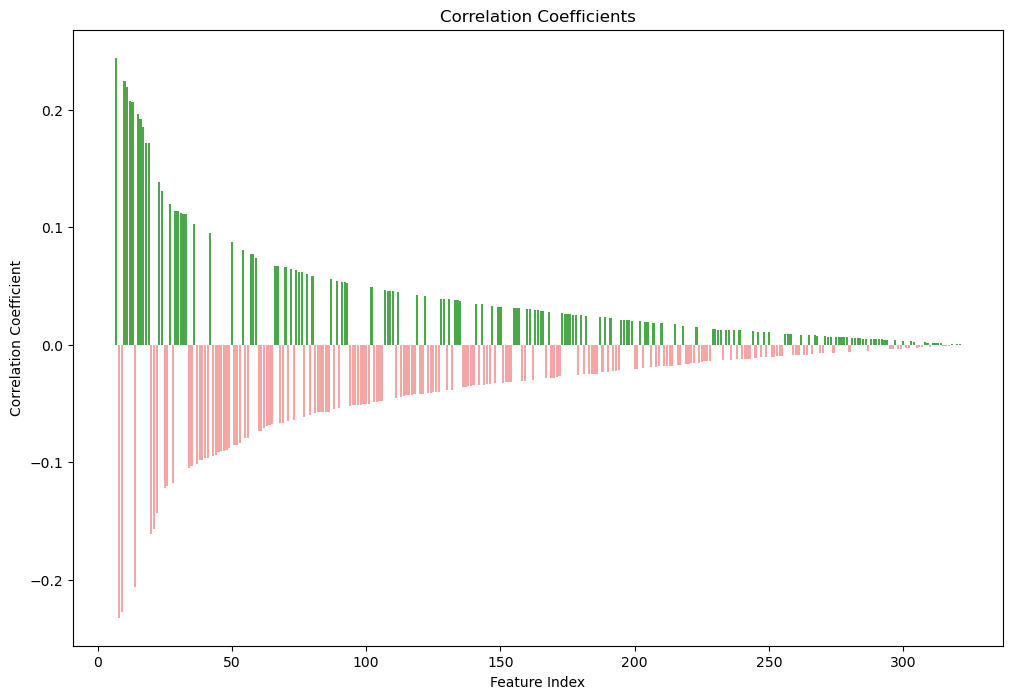

In [97]:
# Sorting correlations by their absolute values for better visualization
correlations = np.array(correlations)
sorted_indices = np.argsort(np.abs(correlations))[::-1]
sorted_correlations = correlations[sorted_indices]

colors = ['lightcoral' if x < 0 else 'green' for x in sorted_correlations]
plt.figure(figsize=(12, 8))
plt.bar(range(len(sorted_correlations)), sorted_correlations, color=colors, alpha=0.7)
plt.title('Correlation Coefficients')
plt.xlabel('Feature Index')
plt.ylabel('Correlation Coefficient')

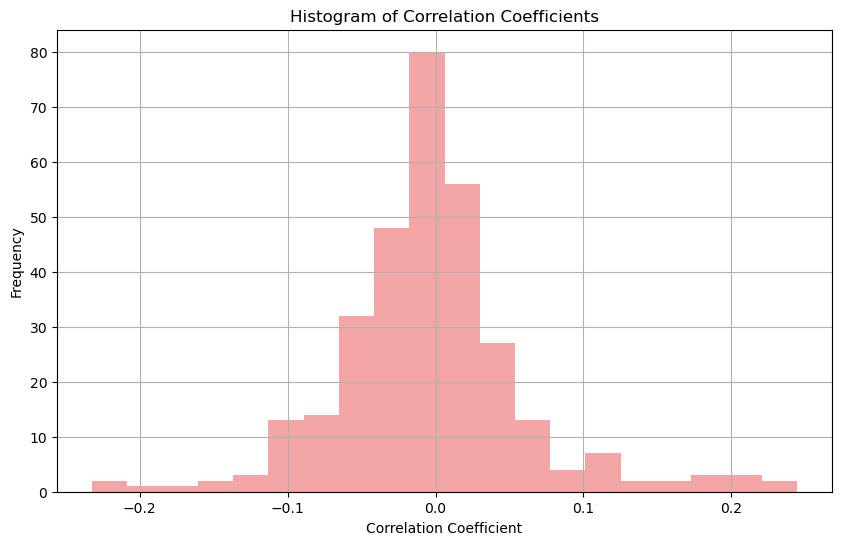

In [98]:
valid_correlations = [corr for corr in correlations if not np.isnan(corr)]

# Plotting the histogram of correlation coefficients
plt.figure(figsize=(10, 6))
plt.hist(valid_correlations, bins=20, color='lightcoral', alpha=0.7)  # Adjust number of bins as needed
plt.title('Histogram of Correlation Coefficients')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Frequency')
plt.grid(True)


In [99]:
correlation_threshold = 0.1 

# Find the indices of the features that have a correlation with the target greater than the threshold
high_corr_indices = [i for i, corr in enumerate(correlations) if abs(corr) >= correlation_threshold]

# Select the features that have high correlation with the target (both for training and test set)
x_train_selected = x_train_filtered_mapped[:, high_corr_indices]
x_test_selected = x_test_filtered_mapped[:, high_corr_indices]

# Store the selected feature names in one variable
selected_feature_names = [features[idx] for idx in high_corr_indices]

# Print selected feature names and their correlations
print("Selected features based on the threshold:")
for idx in high_corr_indices:
    print(f" {features[idx]}, Correlation: {correlations[idx]:.3f}")

print("\nTotal number of highly correlated features:", len(high_corr_indices))
print("Selected feature names:", selected_feature_names)


Selected features based on the threshold:
 LADULT, Correlation: -0.232
 GENHLTH, Correlation: 0.244
 PHYSHLTH, Correlation: -0.120
 BPHIGH4, Correlation: -0.206
 BPMEDS, Correlation: 0.192
 CVDSTRK3, Correlation: -0.101
 HAVARTH3, Correlation: -0.122
 DIABETE3, Correlation: -0.161
 EMPLOY1, Correlation: 0.207
 CHILDREN, Correlation: 0.114
 INTERNET, Correlation: 0.103
 SMOKDAY2, Correlation: 0.112
 LMTJOIN3, Correlation: 0.131
 PNEUVAC3, Correlation: -0.103
 INSULIN, Correlation: 0.114
 CDASSIST, Correlation: -0.104
 DRADVISE, Correlation: -0.143
 ASERVIST, Correlation: -0.118
 CVDASPRN, Correlation: -0.228
 ARTTODAY, Correlation: 0.120
 LASTPAP2, Correlation: 0.112
 PCPSADE1, Correlation: 0.111
 _RFHLTH, Correlation: 0.172
 _HCVU651, Correlation: 0.196
 _RFHYPE5, Correlation: 0.171
 _RFCHOL, Correlation: 0.138
 _DRDXAR1, Correlation: -0.157
 _AGEG5YR, Correlation: 0.219
 _AGE65YR, Correlation: 0.185
 _AGE80, Correlation: 0.225
 _AGE_G, Correlation: 0.207

Total number of highly correl

Text(0.5, 1.0, 'Feature Correlation Matrix')

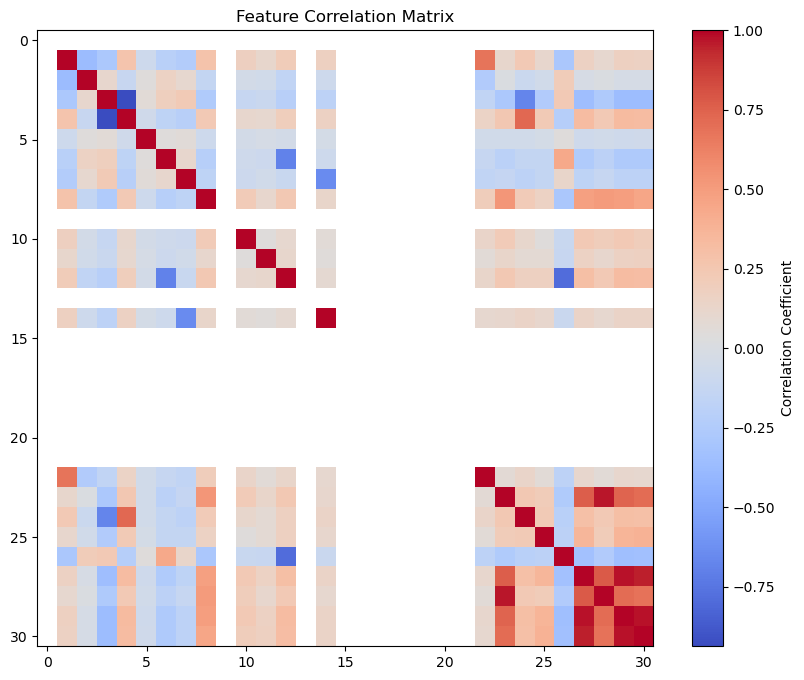

In [100]:
# Compute correlation matrix for the selected features
correlation_matrix = np.corrcoef(x_train_selected, rowvar=False)

# Plot heatmap using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation Coefficient')
plt.title('Feature Correlation Matrix')


Selecting Features:   0%|          | 0/31 [1:51:55<?, ?it/s]


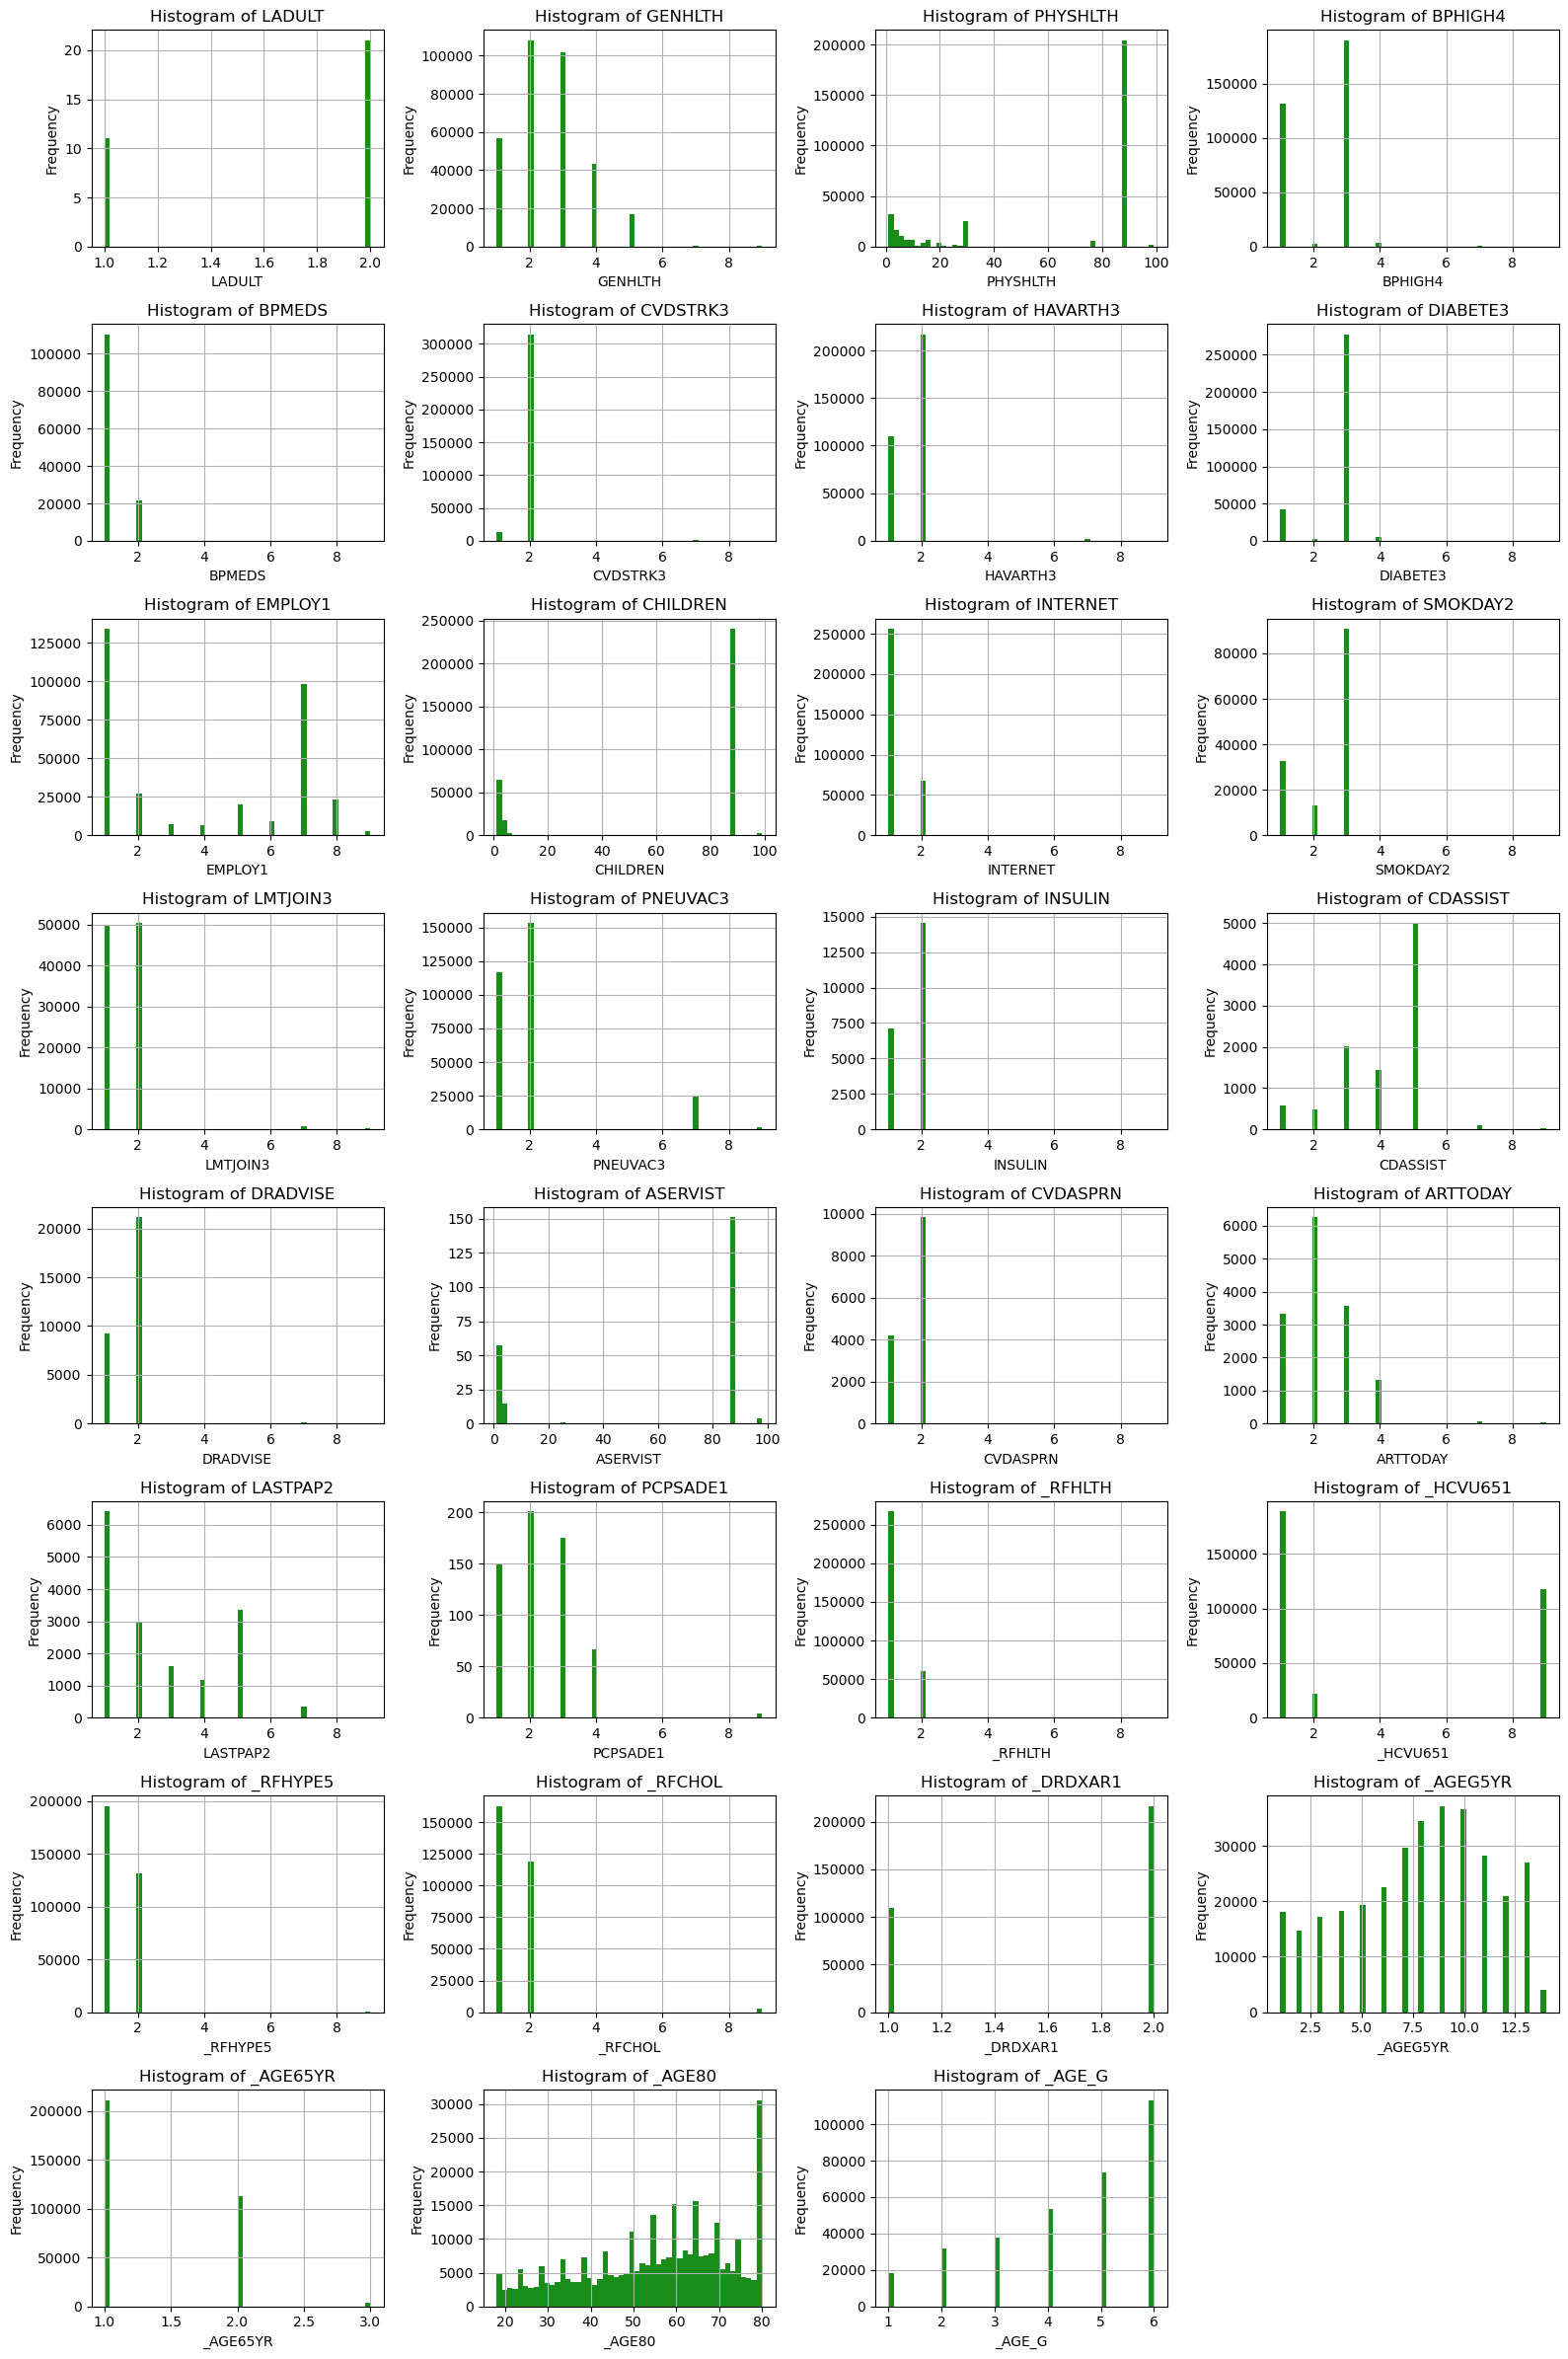

In [101]:
num_features = len(high_corr_indices)
num_cols = 4
num_rows = (num_features + num_cols - 1) // num_cols  # Ensures there are enough rows in the grid

plt.figure(figsize=(num_cols * 4, num_rows * 3))  

for plot_idx, feature_idx in enumerate(high_corr_indices, start=1):
    plt.subplot(num_rows, num_cols, plot_idx)  
    plt.hist(x_train[:, feature_idx], bins=50, color='green', alpha=0.9)
    plt.title(f'Histogram of {features[feature_idx]}')
    plt.xlabel(f'{features[feature_idx]}')
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout() 
plt.show()

#### Training

In [110]:
def split_data(x, y, ratio=0.8):
    indices = np.random.permutation(x.shape[0])
    train_indices = indices[:int(ratio * x.shape[0])]
    test_indices = indices[int(ratio * x.shape[0]):]
    return x[train_indices], y[train_indices], x[test_indices], y[test_indices]

def split_data_k_folds(x, y, n_folds=5):
    # Shuffle the data
    indices = np.random.permutation(x.shape[0])
    
    # Split indices into n equal-sized parts
    fold_sizes = np.full(n_folds, x.shape[0] // n_folds, dtype=int)  # Base size of each fold
    fold_sizes[:x.shape[0] % n_folds] += 1  # Distribute the remainder

    current = 0
    folds = []
    for fold_size in fold_sizes:
        start, stop = current, current + fold_size
        test_indices = indices[start:stop]  # Select current fold as test set
        train_indices = np.concatenate([indices[:start], indices[stop:]])  # Rest are training
        
        x_train, y_train = x[train_indices], y[train_indices]
        x_test, y_test = x[test_indices], y[test_indices]
        folds.append((x_train, y_train, x_test, y_test))
        
        current = stop

    return folds

def fix_class_imbalance(X, y, target_value=1, dont_balance=False):
    if dont_balance:
        return X, y

    # Separate samples by class
    class_1_indices = np.where(y == target_value)[0]
    class_minus_1_indices = np.where(y != target_value)[0]
    
    # Find class counts
    class_1_count = len(class_1_indices)
    class_minus_1_count = len(class_minus_1_indices)
    
    if class_1_count == class_minus_1_count:
        # If classes are already balanced, return the original data
        return X, y
    
    elif class_1_count < class_minus_1_count:
        # If class 1 is the minority, oversample class 1
        oversample_size = class_minus_1_count - class_1_count
        oversampled_indices = np.random.choice(class_1_indices, oversample_size, replace=True)
        new_indices = np.concatenate([np.arange(len(y)), oversampled_indices])
    else:
        # If class -1 is the minority, oversample class -1
        oversample_size = class_1_count - class_minus_1_count
        oversampled_indices = np.random.choice(class_minus_1_indices, oversample_size, replace=True)
        new_indices = np.concatenate([np.arange(len(y)), oversampled_indices])
    
    # Create the balanced dataset
    X_balanced = X[new_indices]
    y_balanced = y[new_indices]
    
    return X_balanced, y_balanced

In [116]:
def cleaning_x_pipeline(x_train, y_train, x_test, features, n_folds=5, dont_balance=False):
    np.random.seed(41)
    # keep only features with less than 10% nan values
    # selected_features = select_features_with_low_nan_ratio(x_train, features, threshold=0.1)
    # keep all features
    # cleaning
    x_train_filtered_mapped = apply_mapping(x_train, selected_feature_names, mapping_dict)
    x_test_filtered_mapped = apply_mapping(x_test, selected_feature_names, mapping_dict)

    if n_folds==0:
        # fix class imbalance in the training set
        x_train_encoded_fixed, y_train_fixed = fix_class_imbalance(x_train_filtered_mapped, y_train, target_value=1, dont_balance=dont_balance)

        return x_train_filtered_mapped, x_train_encoded_fixed, y_train_fixed, x_test_filtered_mapped
    else:
        # split the data into k folds
        folds = split_data_k_folds(x_train_filtered_mapped, y_train, n_folds=n_folds)
        balanced_folds = []

        for x_train_fold, y_train_fold, x_test_fold, y_test_fold in folds:
            # fix class imbalance in the training set
            x_train_fold_fixed, y_train_fold_fixed = fix_class_imbalance(x_train_fold, y_train_fold, target_value=1, dont_balance=dont_balance)
            balanced_folds.append((x_train_fold, x_train_fold_fixed, y_train_fold, y_train_fold_fixed, x_test_fold, y_test_fold))

        return balanced_folds, x_test_filtered_mapped

In [104]:
# calculate the accuracy, precision, recall and F1 score
def accuracy_precision_recall_f1(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    accuracy = (tp + tn) / len(y_true)
    precision = tp / (tp + fp) if tp + fp > 0 else 0
    recall = tp / (tp + fn) if tp + fn > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if precision + recall > 0 else 0
    return accuracy, precision, recall, f1

In [125]:
def evaluate_model(x_train, y_train, x_test, final_features, dont_balance=False, n_folds=5, max_iters=100, gamma=0.01):
    # Map y_train to 0/1 if it is currently -1/1
    y_train_mapped = (1 + y_train[:, 1]) / 2
    
    # Balance the data and split into k-folds
    balanced_folds, x_test_encoded = cleaning_x_pipeline(x_train, y_train_mapped, x_test, final_features, n_folds=n_folds, dont_balance=dont_balance)

    # Initialize array metrics of size n_folds*4
    metrics_train = np.zeros((n_folds, 4))
    metrics_train_fixed = np.zeros((n_folds, 4))
    metrics_test = np.zeros((n_folds, 4))

    for i in range(len(balanced_folds)):
        x_train_fold, x_train_fold_fixed, y_train_fold, y_train_fold_fixed, x_test_fold, y_test_fold = balanced_folds[i]

        # Initialize weights to zero (or you can initialize randomly)
        initial_w = np.zeros(x_train_fold_fixed.shape[1])

        # Train logistic regression on the fold
        w, loss = logistic_regression(y_train_fold_fixed, x_train_fold_fixed, initial_w, max_iters, gamma)

        # Make predictions on the train, train_fixed, and test sets using the logistic regression weights
        y_train_pred = predict_labels(x_train_fold, w)
        y_train_fixed_pred = predict_labels(x_train_fold_fixed, w)
        y_test_pred = predict_labels(x_test_fold, w)

        # Calculate the accuracy, precision, recall, and F1 score
        metrics_train[i] = accuracy_precision_recall_f1(y_train_fold, y_train_pred)
        metrics_train_fixed[i] = accuracy_precision_recall_f1(y_train_fold_fixed, y_train_fixed_pred)
        metrics_test[i] = accuracy_precision_recall_f1(y_test_fold, y_test_pred)

    # Take the average of the metrics across folds
    metrics_train = np.mean(metrics_train, axis=0)
    metrics_train_fixed = np.mean(metrics_train_fixed, axis=0)
    metrics_test = np.mean(metrics_test, axis=0)

    return metrics_train, metrics_train_fixed, metrics_test


def fit_predict_model(x_train, y_train, x_test, final_features, dont_balance=False, max_iters=100, gamma=0.01):
    # Map y_train to 0/1 if it is currently -1/1
    y_train_mapped = (1 + y_train[:, 1]) / 2
    
    # Process and clean the features using the pipeline
    x_train_encoded, x_train_encoded_fixed, y_train_fixed, x_test_encoded = cleaning_x_pipeline(x_train, y_train_mapped, x_test, final_features, dont_balance=dont_balance, n_folds=0)

    # Initialize weights for logistic regression (size based on number of features)
    initial_w = np.zeros(x_train_encoded_fixed.shape[1])

    # Train logistic regression using gradient descent
    w, loss = logistic_regression(y_train_fixed, x_train_encoded_fixed, initial_w, max_iters, gamma)

    # Make predictions on the test and training sets
    y_pred = predict_labels(x_test_encoded, w)
    y_train_pred = predict_labels(x_train_encoded, w)

    # Calculate and print metrics for the training set
    accuracy, precision, recall, f1 = accuracy_precision_recall_f1(y_train_mapped, y_train_pred)
    print(f"Training set: accuracy={accuracy:.2f}, precision={precision:.2f}, recall={recall:.2f}, F1={f1:.5f}")

    return y_pred, y_train_pred


In [128]:
def greedy_feature_selection(x_train, y_train, x_test, features, dont_balance=False, max_iters=100, gamma=0.01):
    # Assuming features is a list of feature names or indices
    remaining_features = features.copy()
    selected_features = []
    best_f1 = 0

    progress_bar = tqdm(total=len(remaining_features), desc="Selecting Features")

    while remaining_features:
        best_feature = None
        best_f1_iteration = 0
        
        # Try adding each remaining feature and evaluate the F1 score
        for feature in remaining_features:
            current_features = selected_features + [feature]  # Add feature to the selected set
            
            # Evaluate model with the current set of features
            metrics_train, metrics_train_fixed, metrics_test = evaluate_model(
                x_train, y_train, x_test, current_features, dont_balance=dont_balance, n_folds=5, max_iters=max_iters, gamma=gamma
            )
            
            f1_test = metrics_test[3]  # Extract F1 score
            
            # If this F1 score is better, keep this feature
            if f1_test > best_f1_iteration:
                best_f1_iteration = f1_test
                best_feature = feature

        # Stop if no improvement
        if best_f1_iteration <= best_f1:
            break

        # Update the selected features
        selected_features.append(best_feature)
        remaining_features.remove(best_feature)
        best_f1 = best_f1_iteration
        
        print(f"Best F1 score: {best_f1}")
        print(f"Selected features: {selected_features}")
        
        # Update the progress bar
        progress_bar.update(1)

    progress_bar.close()  # Close the progress bar when done
    return selected_features, best_f1

# Now, run the greedy feature selection
selected_features, best_f1 = greedy_feature_selection(x_train, y_train, x_test, list(mapping_dict.keys()), dont_balance=False)
print(f"Selected features: {selected_features}")


Selecting Features:   0%|          | 0/79 [00:00<?, ?it/s]

Logistic Regression(0/99): loss=nan, w0=nan, w1=nan
Logistic Regression(1/99): loss=nan, w0=nan, w1=nan
Logistic Regression(2/99): loss=nan, w0=nan, w1=nan
Logistic Regression(3/99): loss=nan, w0=nan, w1=nan
Logistic Regression(4/99): loss=nan, w0=nan, w1=nan
Logistic Regression(5/99): loss=nan, w0=nan, w1=nan
Logistic Regression(6/99): loss=nan, w0=nan, w1=nan
Logistic Regression(7/99): loss=nan, w0=nan, w1=nan
Logistic Regression(8/99): loss=nan, w0=nan, w1=nan
Logistic Regression(9/99): loss=nan, w0=nan, w1=nan
Logistic Regression(10/99): loss=nan, w0=nan, w1=nan
Logistic Regression(11/99): loss=nan, w0=nan, w1=nan
Logistic Regression(12/99): loss=nan, w0=nan, w1=nan
Logistic Regression(13/99): loss=nan, w0=nan, w1=nan
Logistic Regression(14/99): loss=nan, w0=nan, w1=nan
Logistic Regression(15/99): loss=nan, w0=nan, w1=nan
Logistic Regression(16/99): loss=nan, w0=nan, w1=nan
Logistic Regression(17/99): loss=nan, w0=nan, w1=nan
Logistic Regression(18/99): loss=nan, w0=nan, w1=nan
Log

/Users/zaynebmellouli/ml-project-1-kernel-trick/implementations.py:205: RuntimeWarning: invalid value encountered in divide
  return grad
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/var/folders/zv/w1j6q4wj18n431c9sx_sxczh0000gn/T/ipykernel_17448/1583121666.py:7: RuntimeWarning: invalid value encountered in scalar divide
  accuracy = (tp + tn) / len(y_true)


Logistic Regression(0/99): loss=nan, w0=nan, w1=nan
Logistic Regression(1/99): loss=nan, w0=nan, w1=nan
Logistic Regression(2/99): loss=nan, w0=nan, w1=nan
Logistic Regression(3/99): loss=nan, w0=nan, w1=nan
Logistic Regression(4/99): loss=nan, w0=nan, w1=nan
Logistic Regression(5/99): loss=nan, w0=nan, w1=nan
Logistic Regression(6/99): loss=nan, w0=nan, w1=nan
Logistic Regression(7/99): loss=nan, w0=nan, w1=nan
Logistic Regression(8/99): loss=nan, w0=nan, w1=nan
Logistic Regression(9/99): loss=nan, w0=nan, w1=nan
Logistic Regression(10/99): loss=nan, w0=nan, w1=nan
Logistic Regression(11/99): loss=nan, w0=nan, w1=nan
Logistic Regression(12/99): loss=nan, w0=nan, w1=nan
Logistic Regression(13/99): loss=nan, w0=nan, w1=nan
Logistic Regression(14/99): loss=nan, w0=nan, w1=nan
Logistic Regression(15/99): loss=nan, w0=nan, w1=nan
Logistic Regression(16/99): loss=nan, w0=nan, w1=nan
Logistic Regression(17/99): loss=nan, w0=nan, w1=nan
Logistic Regression(18/99): loss=nan, w0=nan, w1=nan
Log

KeyboardInterrupt: 